In [24]:
import word_score
import modules
text="it was very bad"
score=word_score.get_tuple(text)
score=list(score)
score

[0.25, 0.75]

In [15]:
import csv
rulebase=[]
with open("rulebase.csv") as csv_file:
    reader=csv.reader(csv_file)
    rulebase.append(next(reader))
    for row in reader:
        c=row[-1]
        row=[float(val) for val in row[:-1]]+[row[-1]]
        rulebase.append(row)
rulebase[:]

[['pos_score', 'neg_score', 'class'],
 [0.38, 0.0, 'g'],
 [0.33, 0.05, 'g'],
 [0.25, 0.0, 'g'],
 [0.43, 0.0, 'g'],
 [0.44, 0.16, 'g'],
 [0.44, 0.0, 'g'],
 [0.56, 0.06, 'g'],
 [0.25, 0.0, 'g'],
 [0.31, 0.12, 'g'],
 [0.3, 0.21, 'g'],
 [0.28, 0.0, 'g'],
 [0.29, 0.08, 'g'],
 [0.04, 0.23, 'b'],
 [0.09, 0.27, 'b'],
 [0.0, 0.5, 'b'],
 [0.06, 0.19, 'b'],
 [0.0, 0.17, 'b'],
 [0.04, 0.29, 'b'],
 [0.25, 0.25, 'b'],
 [0.12, 0.2, 'b'],
 [0.06, 0.38, 'b'],
 [0.06, 0.25, 'b'],
 [0.1, 0.28, 'b'],
 [0.17, 0.25, 'b'],
 [0.07, 0.34, 'b'],
 [0.12, 0.62, 'b'],
 [0.14, 0.36, 'b'],
 [0.03, 0.25, 'b'],
 [0.0, 0.35, 'b'],
 [0.05, 0.04, 'n'],
 [0.06, 0.0, 'n'],
 [0.09, 0.16, 'n'],
 [0.04, 0.12, 'n'],
 [0.14, 0.02, 'n'],
 [0.21, 0.0, 'n'],
 [0.19, 0.06, 'n'],
 [0.23, 0.16, 'n'],
 [0.1, 0.15, 'n'],
 [0.15, 0.12, 'n'],
 [0.07, 0.07, 'n'],
 [0.04, 0.09, 'n'],
 [0.24, 0.05, 'n'],
 [0.04, 0.12, 'n'],
 [0.12, 0.12, 'n'],
 [0.15, 0.0, 'n'],
 [0.15, 0.0, 'n'],
 [0.17, 0.08, 'n'],
 [0.19, 0.16, 'n'],
 [0.03, 0.06, 'n'],


In [16]:
neighbours=[]
def knn(k,score):
    
    output=None
    distance={}
    for i in range(len(rulebase[1:])):
        p1=rulebase[i+1][:-1]
        
        distance[i+1]=round(modules.distance(len(p1),p1,score),2)
        #print(p1,score,distance[i+1])
    
    distance = sorted(distance.items(), key=lambda x: x[1])
    
   
    distance=distance[:k]
    #print(distance)
    global neighbours
    neighbours=[rulebase[i[0]][:-1] for i in distance]
    
    g_count=b_count=n_count=0
    
    for i in distance:
        if rulebase[i[0]][-1]=='g':
            g_count+=1
        elif rulebase[i[0]][-1]=='b':
            b_count+=1
        elif rulebase[i[0]][-1]=='n':
            n_count+=1
    
    if(g_count== max(g_count,b_count,n_count)):
        output='g'
    if(b_count== max(g_count,b_count,n_count)):
        output='b'

    if(n_count== max(g_count,b_count,n_count)):
        output='n'
    #print(g_count,b_count,n_count)        
    return output

In [25]:
knn(4,score)


'b'

In [26]:

g=[tuple(row[:-1]) for row in rulebase if row[-1]=='g']
b=[tuple(row[:-1]) for row in rulebase if row[-1]=='b']
n=[tuple(row[:-1]) for row in rulebase if row[-1]=='n']
g,b,n,neighbours

([(0.38, 0.0),
  (0.33, 0.05),
  (0.25, 0.0),
  (0.43, 0.0),
  (0.44, 0.16),
  (0.44, 0.0),
  (0.56, 0.06),
  (0.25, 0.0),
  (0.31, 0.12),
  (0.3, 0.21),
  (0.28, 0.0),
  (0.29, 0.08)],
 [(0.04, 0.23),
  (0.09, 0.27),
  (0.0, 0.5),
  (0.06, 0.19),
  (0.0, 0.17),
  (0.04, 0.29),
  (0.25, 0.25),
  (0.12, 0.2),
  (0.06, 0.38),
  (0.06, 0.25),
  (0.1, 0.28),
  (0.17, 0.25),
  (0.07, 0.34),
  (0.12, 0.62),
  (0.14, 0.36),
  (0.03, 0.25),
  (0.0, 0.35)],
 [(0.05, 0.04),
  (0.06, 0.0),
  (0.09, 0.16),
  (0.04, 0.12),
  (0.14, 0.02),
  (0.21, 0.0),
  (0.19, 0.06),
  (0.23, 0.16),
  (0.1, 0.15),
  (0.15, 0.12),
  (0.07, 0.07),
  (0.04, 0.09),
  (0.24, 0.05),
  (0.04, 0.12),
  (0.12, 0.12),
  (0.15, 0.0),
  (0.15, 0.0),
  (0.17, 0.08),
  (0.19, 0.16),
  (0.03, 0.06),
  (0.23, 0.04)],
 [[0.12, 0.62], [0.0, 0.5], [0.14, 0.36], [0.06, 0.38]])

In [27]:
score=[score]

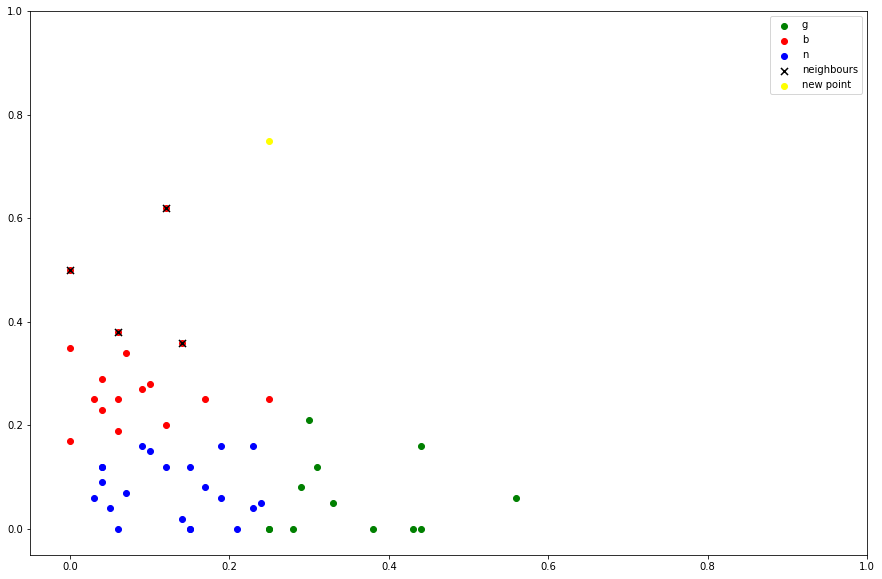

In [28]:
colors=["#0000FF", "#00FF00", "#FF0066"]

%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
fig = plt.figure(figsize=(15,10))
#ax = fig.add_subplot(111, projection='3d')

if len(g)>0:
    plt.scatter(*zip(*g),label='g',color="green")
if len(b)>0:
    plt.scatter(*zip(*b),label='b',color="red")
if len(n)>0:
    plt.scatter(*zip(*n),label='n',color="blue")
plt.scatter(*zip(*neighbours),label='neighbours',marker='x',color="black",s=50)
plt.scatter(*zip(*score),label="new point",color="yellow")

#ax.scatter(0,0,10,marker='x')
plt.xlim(-0.05, 1)
plt.ylim(-0.05, 1)

plt.legend()